<a href="https://colab.research.google.com/github/rjrizani/machine-learning/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [1]:
import pandas as pd

file_id = '1CqQ5SYtPKTOHBX6i-XDnbAMtR-5lWP3L'
url = 'https://drive.google.com/uc?id={}'.format(file_id)
data = pd.read_csv(url)

In [2]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#data Processing: data formating

In [5]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [6]:
data.duplicated().sum()

0

In [7]:
data['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
#convert 'mainroad' column
data['mainroad'] = data['mainroad'].replace({'yes':1,'no':0}).astype(int)

<ipython-input-8-5ddc8e3877f3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['mainroad'] = data['mainroad'].replace({'yes':1,'no':0}).astype(int)


In [9]:
data['guestroom'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
#convert basement, hotwaterheating, aircondition, prefarea, furnishing
# Convert 'basement' column
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})

# Convert 'hotwaterheating' column
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})

#convert  'aircondition' column
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})

# Convert 'prefarea' column
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

#convert furnishing column
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})



In [11]:
#convert guestroom column
data['guestroom'] = data['guestroom'].map({'yes':1,'no':0})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


# Exploratory Data analysis

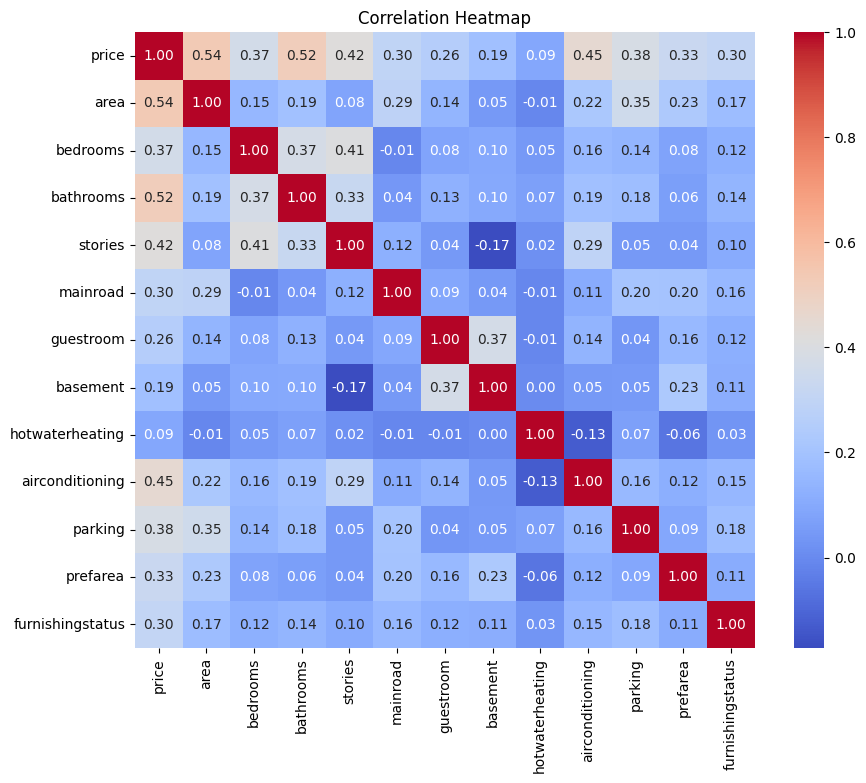

In [13]:
#heatMap and correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corrlation_matrix = data.corr()
sns.heatmap(corrlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

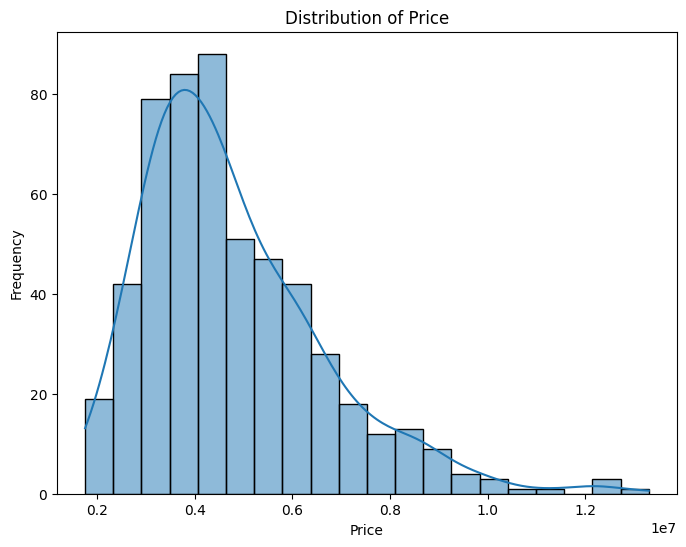

In [14]:
#plot histogram for 'price' column
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

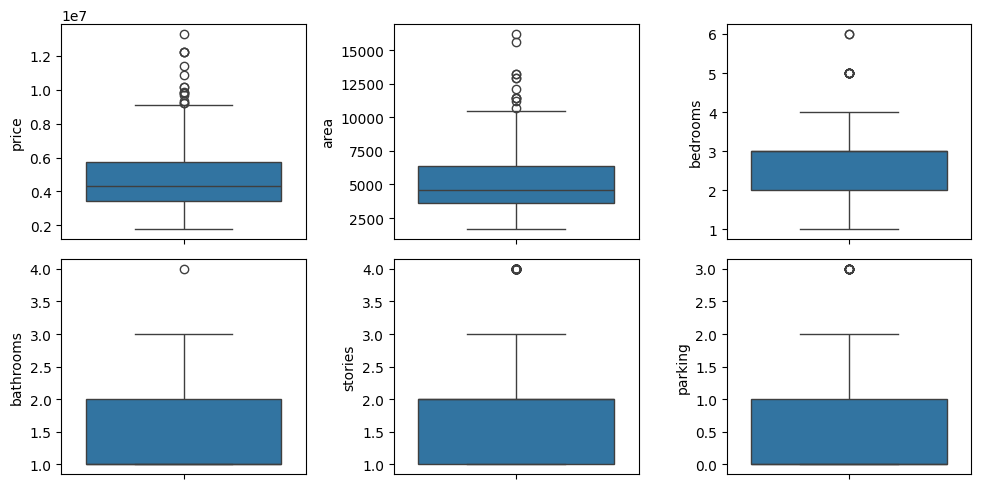

In [15]:
#create a 2x3 grid of subplot
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
#create a box plot  for 'price' in the first subplot
plt1 = sns.boxplot(data['price'],  ax=axs[0, 0])
#create a box plot for 'area' in the second subplot
plt2 = sns.boxplot(data['area'],  ax=axs[0, 1])
#create a box plot for 'bedrooms' in the third subplot
plt3 = sns.boxplot(data['bedrooms'],  ax=axs[0, 2])
#create a box plot for 'bathroam'
plt4 = sns.boxplot(data['bathrooms'],  ax=axs[1, 0])
#create a box plot for 'stories'
plt5 = sns.boxplot(data['stories'],  ax=axs[1, 1])
#create a box plot for 'parking'
plt6 = sns.boxplot(data['parking'],  ax=axs[1, 2])
plt.tight_layout()
plt.show()


In [16]:
#Handling outlier in the price
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

#calculate upper and lower bounds to indetify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identify outliers
outliers_price = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

In [17]:
outliers_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,2
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0


In [18]:
#Handling outlier in the area
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)

IQR = Q3 - Q1

#calculate upper and lower bounds to indetify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identify outliers
outliers_area = data[(data['area'] < lower_bound) | (data['area'] > upper_bound)]


In [19]:
outliers_area

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,2
56,7343000,11440,4,1,2,1,0,1,0,0,1,1,1
64,7000000,11175,3,1,1,1,0,1,0,1,1,1,2
66,6930000,13200,2,1,1,1,0,1,1,0,1,0,2
69,6790000,12090,4,2,2,1,0,0,0,0,2,1,2
125,5943000,15600,3,1,1,1,0,0,0,1,2,0,1
129,5873000,11460,3,1,3,1,0,0,0,0,2,1,1
186,5110000,11410,2,1,2,1,0,0,0,0,0,1,2
191,5040000,10700,3,1,2,1,1,1,0,0,0,0,1


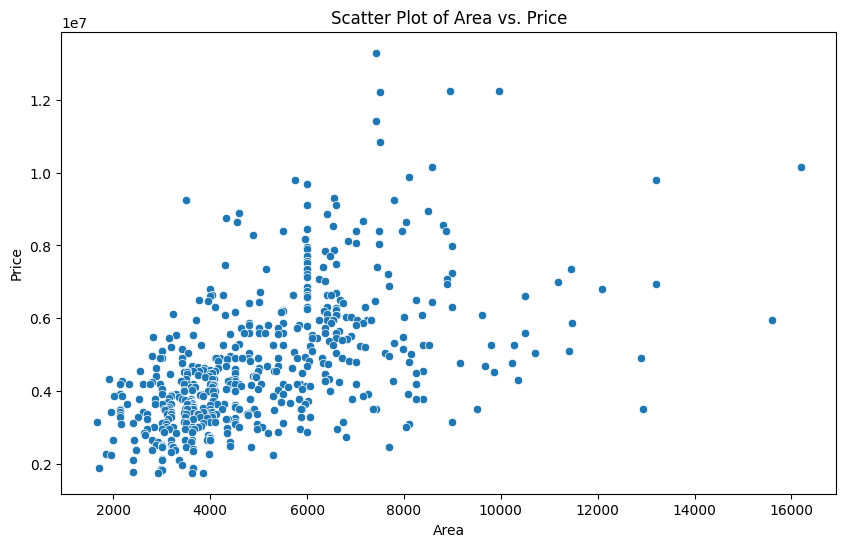

In [20]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='area', y='price')
plt.title('Scatter Plot of Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

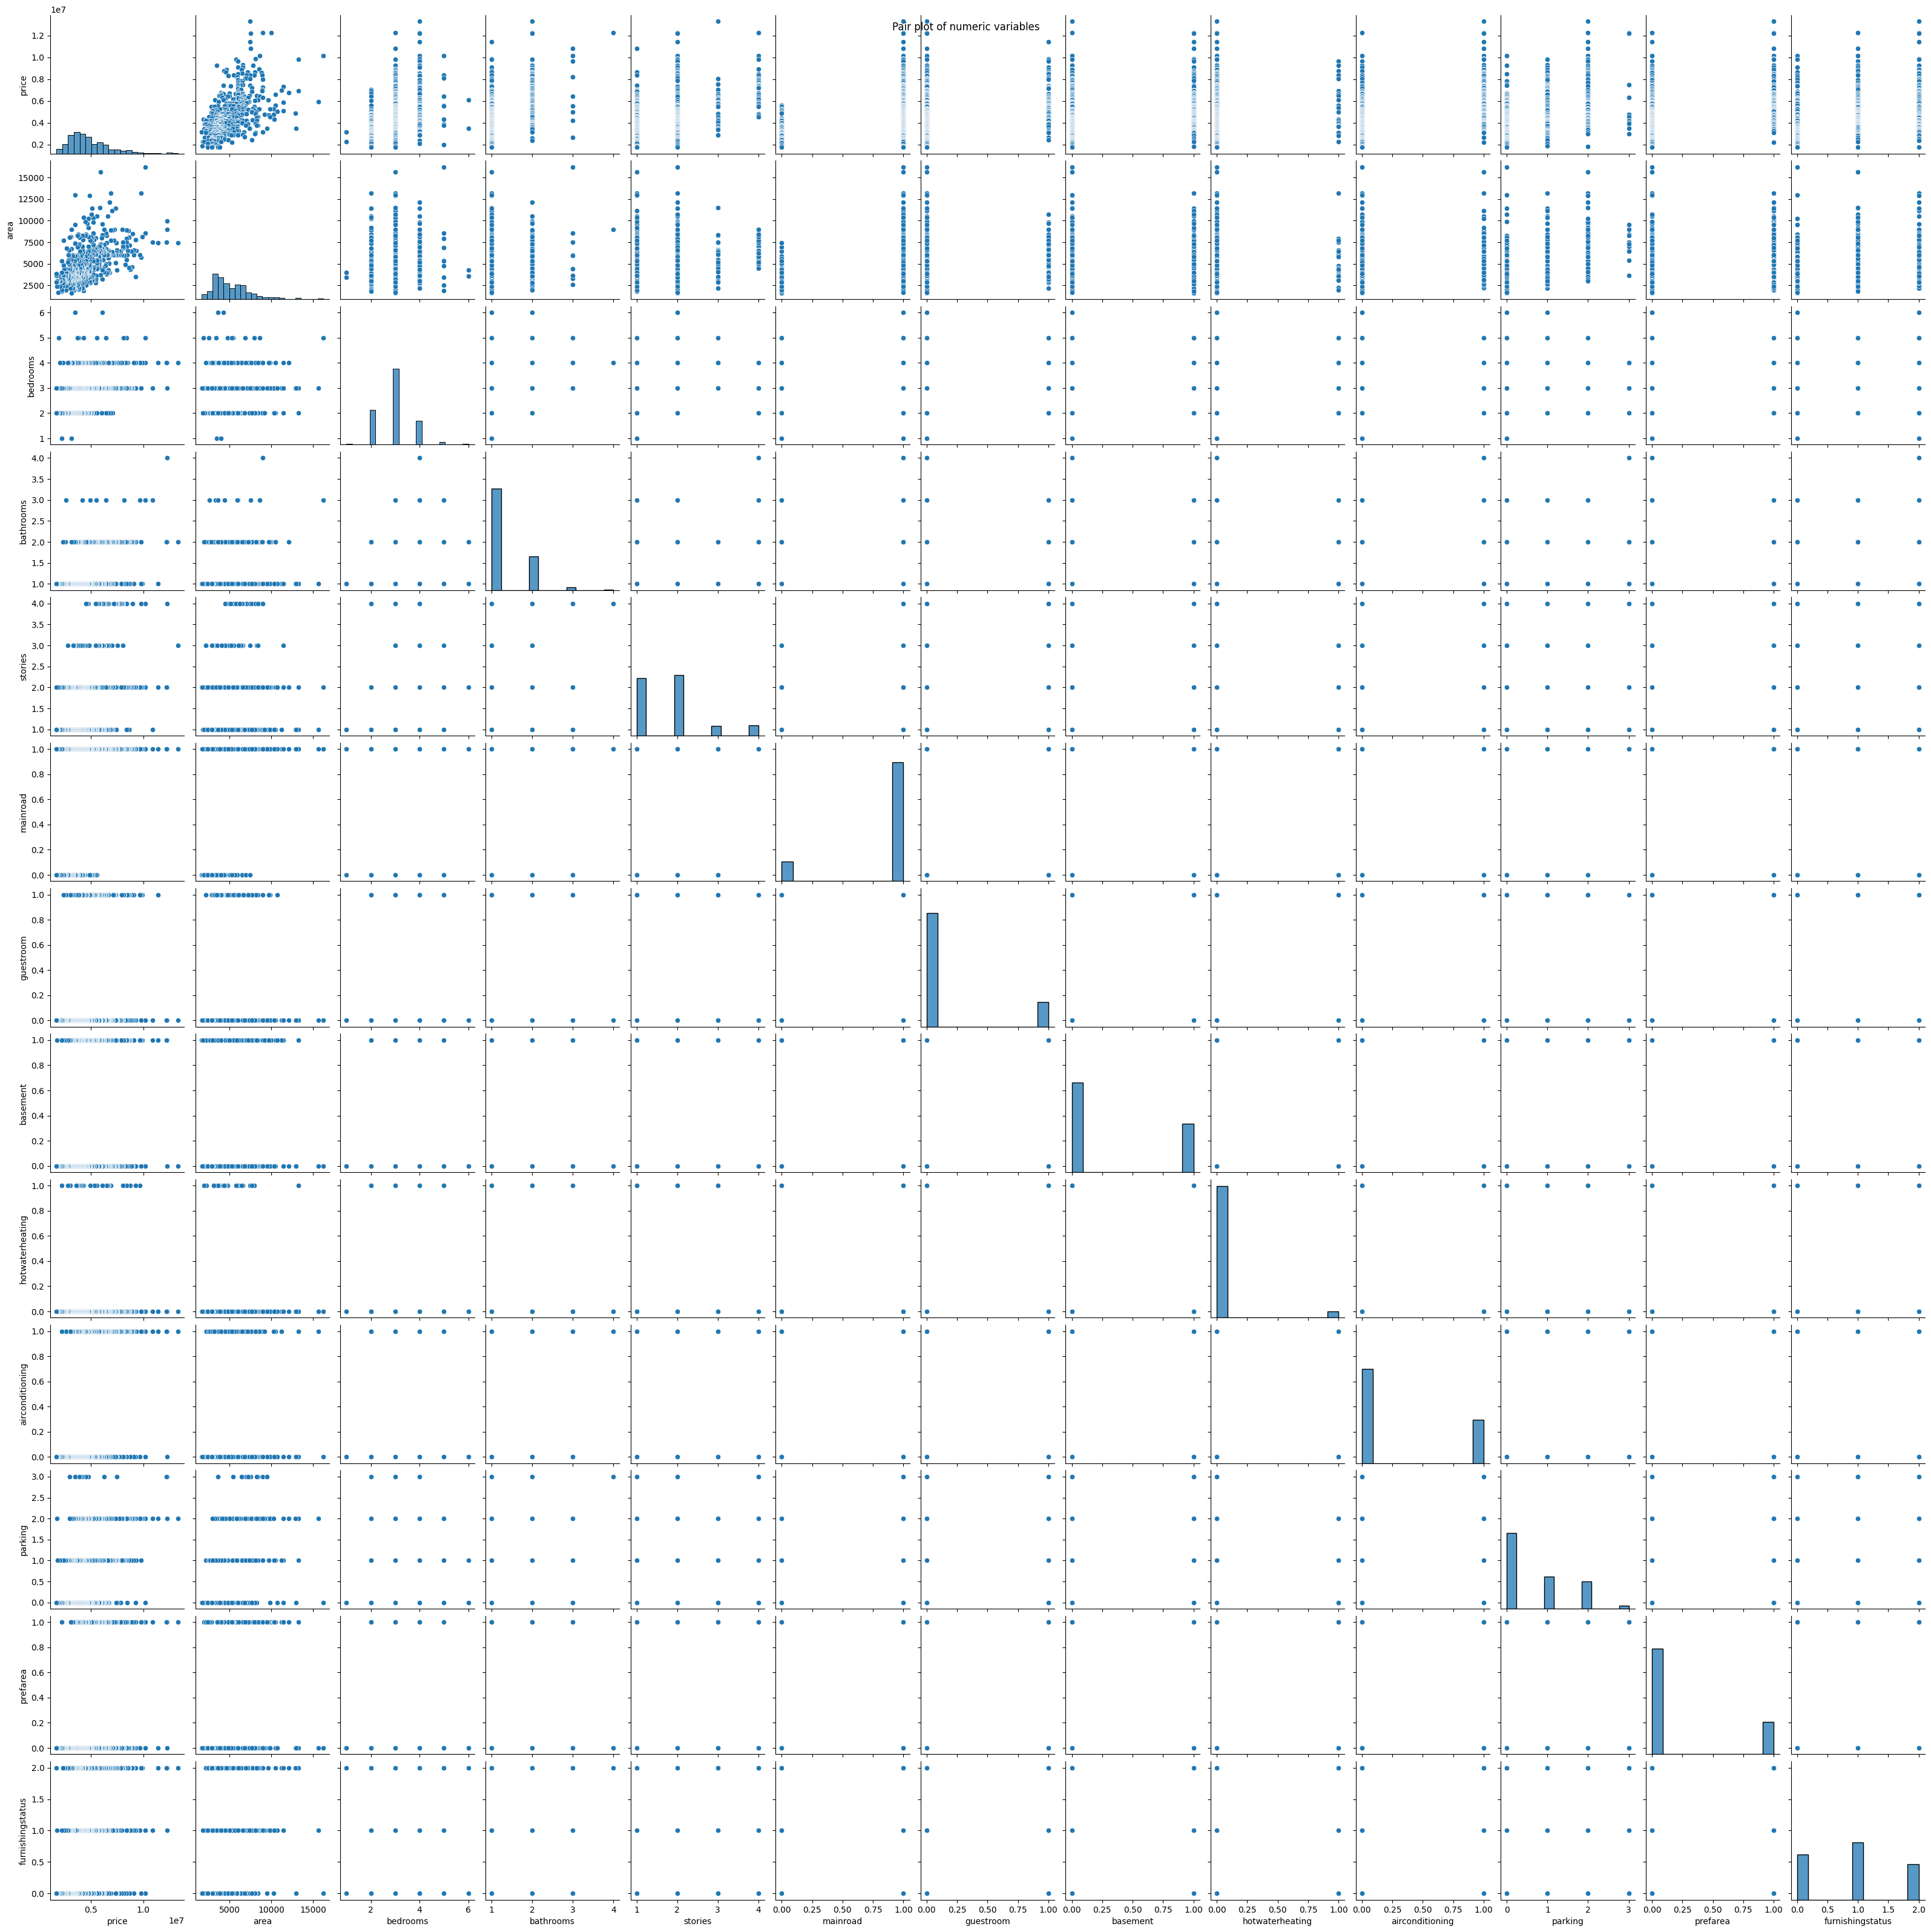

In [21]:
#pair plot for numeric var
sns.pairplot(data)
plt.suptitle("Pair plot of numeric variables")
plt.show()



# Features and Target

In [22]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [23]:
features = data.drop(columns=['price'])
target = data['price']

# data splitting


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#Model Training

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
#create a linear Regression model
linear_model = LinearRegression()

#train the model using traning data
linear_model.fit(X_train, y_train)


LinearRegression()

In [27]:
from sklearn.ensemble import RandomForestRegressor

#create model
rf_model = RandomForestRegressor()

#train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

# Model Evaluation

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#make prediction using the linear reqression model
linear_predictions = linear_model.predict(X_test)

In [31]:
#calculate mea,mae,r2 for linear reg model
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

In [32]:
print("Linear Regression Metrics:")
print("Mean Squared Error:", linear_mse)
print("Mean Absolute Error:", linear_mae)
print("R-squared:", linear_r2)

Linear Regression Metrics:
Mean Squared Error: 1771751116594.0352
Mean Absolute Error: 979679.6912959901
R-squared: 0.6494754192267803


In [33]:
#make prediction using random forest reg model
rf_predictions = rf_model.predict(X_test)

In [34]:
#calculate mae,mse,r2
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [35]:
print("Random Forest Regression Metrics:")
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R-squared:", rf_r2)

Random Forest Regression Metrics:
Mean Squared Error: 2001470584893.1228
Mean Absolute Error: 1031583.5009174311
R-squared: 0.6040275458958023


# Model prediction

In [37]:
#Define the feature for the test instance
test_area = 6000
test_bedrooms = 3
test_bathrooms = 2
test_stories = 2
test_mainroad = 1
test_guestroom = 0
test_basement = 1
test_hotwaterheating = 0
test_airconditioning = 1
test_parking = 2
test_prefarea = 1
test_furnishingstatus = 2  # Furnished

#create a dataframe with test instant
test_data = pd.DataFrame({
    'area': [test_area],
    'bedrooms': [test_bedrooms],
    'bathrooms': [test_bathrooms],
    'stories': [test_stories],
    'mainroad': [test_mainroad],
    'guestroom': [test_guestroom],
    'basement': [test_basement],
    'hotwaterheating': [test_hotwaterheating],
    'airconditioning': [test_airconditioning],
    'parking': [test_parking],
    'prefarea': [test_prefarea],
    'furnishingstatus': [test_furnishingstatus]
})

#predict the price using linear req model
predicted_price_linear = linear_model.predict(test_data)
print(f"Predicted Price (Linear Regression): {predicted_price_linear[0]:.2f}")




Predicted Price (Linear Regression): 7577529.28
